### >Why Should I use matplotlib and Seaborn?
#### MATPLOTLIB is better for basic plots while SEABORN is better for more advanced statistical plots.
#### # Matplotlib is a library in Python that enables users to generate visualizations like histograms, scatter plots, bar charts, pie charts and much more.
#### # Seaborn is a visualization library that is built on top of Matplotlib. It provides data visualizations that are typically more aesthetic and statistically sophisticated.

# 1.HANDLING OUTLIERS USING FIVE SUMMARY AND BOX PLOT

# 2.DATA ENCODING

## ->1.HANDLING OUTLIERS USING FIVE SUMMARY AND BOX PLOT

#### # A five-number summary is especially useful in descriptive analyses or during the preliminary investigation of a large data set.

#### # A summary consists of five values: the most extreme values in the data set (the maximum and minimum values), the lower and upper quartiles, and the median.

In [2]:
import numpy as np

In [6]:
price =[125,130,135,140,145,151,155,158,165,170,172,175]

In [8]:
print(len(price))

12


### Declearing Minimum,Q1-(25th Percentile),Median-(50th Percentile),Q3-(75th Percentile),Maximum

In [12]:
minimum,Q1,median,Q3,maximum=np.quantile(price,[0,0.25,0.50,0.75,1.0])

In [14]:
print(minimum)
print(Q1)
print(median)
print(Q3)
print(maximum)

125.0
138.75
153.0
166.25
175.0


In [16]:
## Finding Inter Quatile Range(IQR)

In [17]:
IQR = Q3-Q1
print(IQR)

27.5


In [18]:
lower_fence =Q1-1.5*(IQR)
higher_fence = Q3+1.5*(IQR)

In [19]:
lower_fence

97.5

In [20]:
higher_fence

207.5

In [5]:
import seaborn as sns

<Axes: >

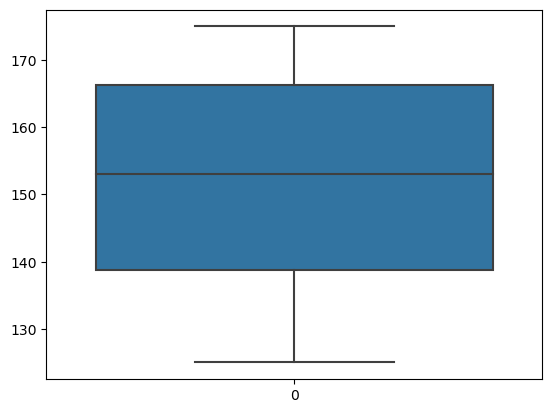

In [21]:
sns.boxplot(price)

In [24]:
## Suppose if we have this type of data 

price_of_fruits =[125,130,135,140,145,151,155,158,165,170,172,175,1009]

<Axes: >

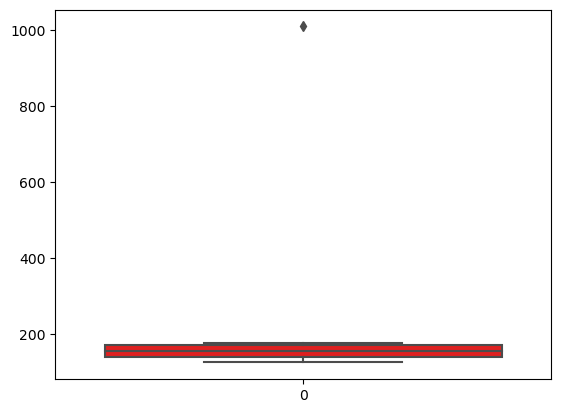

In [26]:
sns.boxplot(price_of_fruits,color='red')

In [46]:
price_of_fruits2 =[-125,200,100,130,135,140,-145,151,155,158,165,190,195]

<Axes: >

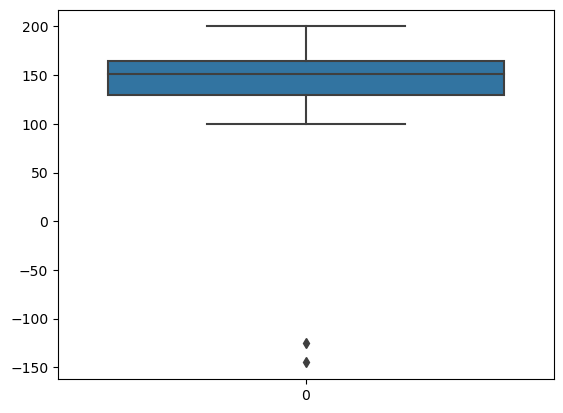

In [47]:
sns.boxplot(price_of_fruits2)

## ->2.Data Encoding : Encoding is a technique of converting categorical variables into numerical values so that it could be easily fitted to a machine learning model.

## a.LABLE ENCODING
## b.OHE HOT ENCODING
## c.Ordinal Encoding

### ->a.Lable Encoding :Label encoding involves assigning a unique numerical label to each category in the variable. 

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
df = {'colour':['blue','green','blue','green','pink']}

In [6]:
data = pd.DataFrame(df)

In [7]:
data.head()

,colour
0,blue
1,green
2,blue
3,green
4,pink


In [8]:
from sklearn.preprocessing import LabelEncoder


In [9]:
label_En=LabelEncoder()

In [10]:
label_En.fit_transform(data[['colour']])

C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 1, 2])

In [11]:
label_En.transform([['blue']])

C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0])

In [12]:
label_En.transform([['green']])

C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1])

In [13]:
label_En.transform([['pink']])

C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2])

###  ->ONE HOT ENCODING : One hot encoding, also known as nominal encoding, is a technique used to represent categorical data as numerical data, which is more suitable for machine learning algorithms. 
    

In [14]:
df = pd.DataFrame({
    'colour': ['pink', 'blue', 'green', 'green', 'red', 'blue']
})

In [18]:
df

,colour
0,pink
1,blue
2,green
3,green
4,red
5,blue


In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
one_hotEn = OneHotEncoder()

In [17]:
data_one = one_hotEn.fit_transform(df[['colour']]).toarray()

In [23]:
data_one

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [24]:
one_Ho_Enc = pd.DataFrame(data_one,columns=one_hotEn.get_feature_names_out())

In [25]:
one_Ho_Enc

,colour_blue,colour_green,colour_pink,colour_red
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0
5,1.0,0.0,0.0,0.0


In [26]:
one_hotEn.transform([['blue']]).toarray()

C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0., 0.]])

In [29]:
# For Easy Understand
pd.concat([df,one_Ho_Enc],axis=1)

,colour,colour_blue,colour_green,colour_pink,colour_red
0,pink,0.0,0.0,1.0,0.0
1,blue,1.0,0.0,0.0,0.0
2,green,0.0,1.0,0.0,0.0
3,green,0.0,1.0,0.0,0.0
4,red,0.0,0.0,0.0,1.0
5,blue,1.0,0.0,0.0,0.0


## DISADVANTAGE 

### >If there are 100 categories then it will create 100 features

### #>We should not use One Hot when we have huge data

## ->c.Ordinal Encoding : It is used to encode categorical data that have an intrinsic order or ranking. 

In [30]:
from sklearn.preprocessing import OrdinalEncoder

In [31]:
data = pd.DataFrame({
    'size':['small','medium','large','medium','small','large']
})

In [32]:
data

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [33]:
or_Enc = OrdinalEncoder(categories=[['small','medium','large']])

In [35]:
or_Enc.fit_transform(data[['size']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

In [36]:
or_Enc.transform([['small']])

C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[0.]])

In [37]:
or_Enc.transform([['large']])

C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[2.]])

In [38]:
or_Enc.transform([['medium']])

C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[1.]])

## Target Guided Ordinal Encoding

It is a technique used to encode categorical variables based on their relationship with the target variable. 

This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

 In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [1]:
import pandas as pd

# create a sample dataframe with a categorical variable and a target variable
df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})

In [2]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [3]:
mean_price=df.groupby("city")['price'].mean().to_dict()

In [4]:
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [5]:
df['city_encoded']=df['city'].map(mean_price)

In [6]:
df[['price','city_encoded']]

,price,city_encoded
0,200,190.0
1,150,150.0
2,300,310.0
3,250,250.0
4,180,190.0
5,320,310.0


In [9]:
import seaborn as sns

In [10]:
data=sns.load_dataset('tips')

In [14]:
dt=data.head(10)

In [15]:
dt

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [16]:
mean_sex = dt.groupby('sex')['tip'].mean().to_dict()

In [17]:
mean_sex

{'Male': 2.93625, 'Female': 2.31}

In [19]:
dt['data_encoded']=dt['sex'].map(mean_sex)

C:\Users\vishn\AppData\Local\Temp\ipykernel_10340\4124411694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['data_encoded']=dt['sex'].map(mean_sex)


In [20]:
dt[['tip','data_encoded']]

,tip,data_encoded
0,1.01,2.31000
1,1.66,2.93625
2,3.50,2.93625
3,3.31,2.93625
4,3.61,2.31000
5,4.71,2.93625
6,2.00,2.93625
7,3.12,2.93625
8,1.96,2.93625
9,3.23,2.93625
